# Fortnite Stats analyse

In [28]:
import matplotlib.pyplot as plt
import requests


api_key = 'a3f031a9-67fe-48b0-8438-260ddf04880e'
api_url = 'https://fortnite-api.com/v2/stats/br/v2'
player_input = {}


def get_player_input(player_number):
    global player_input
    if player_number not in player_input:
        player_input[player_number] = input(f'Enter player {player_number} name: ')
    return player_input[player_number]


def get_player_stats(player_name):
    headers = {'Authorization': api_key}
    params = {'name': player_name}
    response = requests.get(api_url, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()
        overall_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('overall', {})
        solo_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('solo', {})
        duo_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('duo', {})
        squad_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('squad', {})

        return overall_stats, solo_stats, duo_stats, squad_stats
    else:
        print(f"Error calling the API for {player_name}. Status code: {response.status_code}")
        print(response.text)
        return None

def print_stats(stats, player_name, stat_names):
    for stat_name in stat_names:
        print_stat(stat_name, stats, player_name)


def print_stat(stat_name, stats, player_name):
    if stats and stat_name in stats:
        stat_value = stats[stat_name]
        print(f"Number of {stat_name} for {player_name}: {stat_value}")


def main():
    global player_input
    player_input = {}  # Reset the global dictionary for each execution
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    if player1_name and player2_name:
        player1_stats = get_player_stats(player1_name)
        player2_stats = get_player_stats(player2_name)

        if player1_stats and player2_stats:
            print("\nPlayer 1 Stats:")
            overall_stats, solo_stats, duo_stats, squad_stats = player1_stats

            print("\nOverall stats:")
            stat_names_overall = ['wins', 'top3', 'top5', 'top6', 'top10', 'top12', 'top25', 'kills', 'deaths', 'kd',
                                  'matches', 'minutesPlayed']
            print_stats(overall_stats, player1_name, stat_names_overall)

            print("\nSolo stats:")
            print_stats(solo_stats, player1_name, stat_names_overall)

            print("\nDuo stats:")
            print_stats(duo_stats, player1_name, stat_names_overall)

            print("\nSquad stats:")
            print_stats(squad_stats, player1_name, stat_names_overall)

            print("\nPlayer 2 Stats:")
            overall_stats, solo_stats, duo_stats, squad_stats = player2_stats

            print("\nOverall stats:")
            print_stats(overall_stats, player2_name, stat_names_overall)

            print("\nSolo stats:")
            print_stats(solo_stats, player2_name, stat_names_overall)

            print("\nDuo stats:")
            print_stats(duo_stats, player2_name, stat_names_overall)

            print("\nSquad stats:")
            print_stats(squad_stats, player2_name, stat_names_overall)

            # Voeg hier meer vergelijkingslogica toe indien nodig

        else:
            print("Player information not available.")

if __name__ == "__main__":
    main()



Player 1 Stats:

Overall stats:
Number of wins for Kiirbb_: 349
Number of top3 for Kiirbb_: 210
Number of top5 for Kiirbb_: 327
Number of top6 for Kiirbb_: 330
Number of top10 for Kiirbb_: 368
Number of top12 for Kiirbb_: 550
Number of top25 for Kiirbb_: 677
Number of kills for Kiirbb_: 10907
Number of deaths for Kiirbb_: 4681
Number of kd for Kiirbb_: 2.33
Number of matches for Kiirbb_: 5030
Number of minutesPlayed for Kiirbb_: 34701

Solo stats:
Number of wins for Kiirbb_: 88
Number of top10 for Kiirbb_: 368
Number of top25 for Kiirbb_: 677
Number of kills for Kiirbb_: 2573
Number of deaths for Kiirbb_: 1516
Number of kd for Kiirbb_: 1.697
Number of matches for Kiirbb_: 1604
Number of minutesPlayed for Kiirbb_: 5594

Duo stats:
Number of wins for Kiirbb_: 132
Number of top5 for Kiirbb_: 327
Number of top12 for Kiirbb_: 550
Number of kills for Kiirbb_: 2869
Number of deaths for Kiirbb_: 1499
Number of kd for Kiirbb_: 1.914
Number of matches for Kiirbb_: 1631
Number of minutesPlayed f

In [29]:
def print_overall_stats_table(overall_stats, player_name, stat_names):
    table = []
    table.append(f"{player_name} Stats:")
    for stat_name in stat_names:
        if overall_stats and stat_name in overall_stats:
            stat_value = overall_stats[stat_name]
            table.append(f"{stat_name}: {stat_value}")
    return table


def main():
    global player_input
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    player1_stats = get_player_stats(player1_name)
    player2_stats = get_player_stats(player2_name)

    if player1_stats and player2_stats:
        stat_names_overall = ['wins', 'top3', 'top5', 'top6', 'top10', 'top12', 'top25', 'kills', 'deaths', 'kd', 'matches', 'winRate', 'minutesPlayed']

        table_p1 = print_overall_stats_table(player1_stats[0], player1_name, stat_names_overall)
        table_p2 = print_overall_stats_table(player2_stats[0], player2_name, stat_names_overall)

        print("\nOverall Stats Comparison:")
        for line_p1, line_p2 in zip(table_p1, table_p2):
            print(f"{line_p1.ljust(40)} {line_p2}")

    else:
        print("Player information not available.")


if __name__ == "__main__":
    main()



Overall Stats Comparison:
Kiirbb_ Stats:                           Derve Xander Stats:
wins: 349                                wins: 224
top3: 210                                top3: 105
top5: 327                                top5: 474
top6: 330                                top6: 188
top10: 368                               top10: 548
top12: 550                               top12: 1042
top25: 677                               top25: 1300
kills: 10907                             kills: 12802
deaths: 4681                             deaths: 9356
kd: 2.33                                 kd: 1.368
matches: 5030                            matches: 9580
winRate: 6.938                           winRate: 2.338
minutesPlayed: 34701                     minutesPlayed: 81218


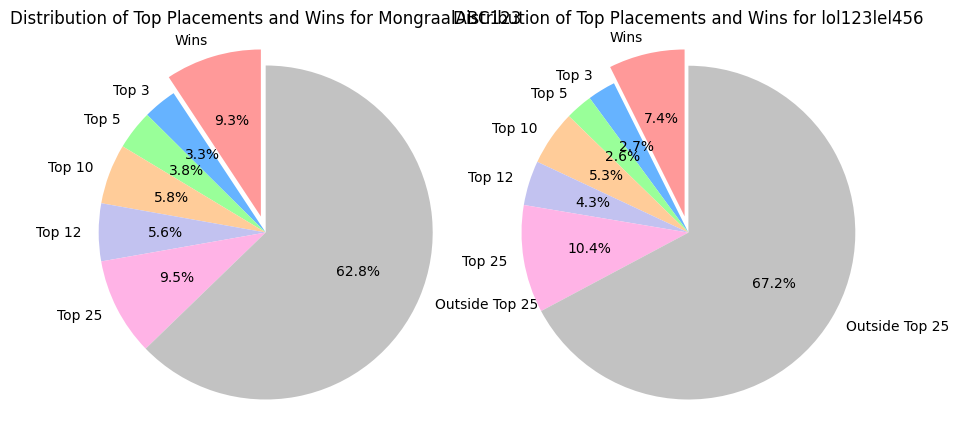

In [35]:
import requests
import matplotlib.pyplot as plt

api_key = 'a3f031a9-67fe-48b0-8438-260ddf04880e'
api_url = 'https://fortnite-api.com/v2/stats/br/v2'
player_input = {}


def get_player_input(player_number):
    global player_input
    if player_number not in player_input:
        player_input[player_number] = input(f'Enter player {player_number} name: ')
    return player_input[player_number]


def get_player_stats(player_name):
    headers = {'Authorization': api_key}
    params = {'name': player_name}
    response = requests.get(api_url, headers=headers, params=params)

    if response.status_code == 200:
        data = response.json()
        overall_stats = data.get('data', {}).get('stats', {}).get('all', {}).get('overall', {})
        return overall_stats
    else:
        print(f"Error calling the API for {player_name}. Status code: {response.status_code}")
        print(response.text)
        return None


def get_top_placement_percentages(stats):
    if stats:
        overall_matches = stats.get('matches', 0)
        overall_wins = stats.get('wins', 0)

        overall_win_percentage = (overall_wins / overall_matches) * 100 if overall_matches > 0 else 0
        overall_top3_percentage = (stats.get('top3', 0) / overall_matches) * 100 if overall_matches > 0 else 0
        overall_top5_percentage = (stats.get('top5', 0) / overall_matches) * 100 if overall_matches > 0 else 0
        overall_top10_percentage = (stats.get('top10', 0) / overall_matches) * 100 if overall_matches > 0 else 0
        overall_top12_percentage = (stats.get('top12', 0) / overall_matches) * 100 if overall_matches > 0 else 0
        overall_top25_percentage = (stats.get('top25', 0) / overall_matches) * 100 if overall_matches > 0 else 0

        # Calculate percentage outside top 25
        outside_top25_percentage = 100 - (overall_win_percentage + overall_top3_percentage + overall_top5_percentage +
                                           overall_top10_percentage + overall_top12_percentage + overall_top25_percentage)

        return (
            overall_win_percentage, overall_top3_percentage, overall_top5_percentage,
            overall_top10_percentage, overall_top12_percentage, overall_top25_percentage,
            outside_top25_percentage
        )
    else:
        return 0, 0, 0, 0, 0, 0, 0


def plot_pie_chart(ax, player_name, percentages):
    labels = ['Wins', 'Top 3', 'Top 5', 'Top 10', 'Top 12', 'Top 25', 'Outside Top 25']
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2c2']
    explode = (0.1, 0, 0, 0, 0, 0, 0)

    ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
    ax.set_title(f'Distribution of Top Placements and Wins for {player_name}')
    ax.axis('equal')


def main():
    global player_input
    player_input = {}  # Reset the global dictionary for each execution
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    if player1_name and player2_name:
        player1_stats = get_player_stats(player1_name)
        player2_stats = get_player_stats(player2_name)

        if player1_stats and player2_stats:
            # Player 1
            (
                overall_win_percentage1,
                overall_top3_percentage1,
                overall_top5_percentage1,
                overall_top10_percentage1,
                overall_top12_percentage1,
                overall_top25_percentage1,
                outside_top25_percentage1
            ) = get_top_placement_percentages(player1_stats)

            # Player 2
            (
                overall_win_percentage2,
                overall_top3_percentage2,
                overall_top5_percentage2,
                overall_top10_percentage2,
                overall_top12_percentage2,
                overall_top25_percentage2,
                outside_top25_percentage2
            ) = get_top_placement_percentages(player2_stats)

            # Set up subplots
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))

            # Plot for Player 1
            plot_pie_chart(
                axes[0],
                player1_name,
                [overall_win_percentage1, overall_top3_percentage1, overall_top5_percentage1, overall_top10_percentage1, overall_top12_percentage1, overall_top25_percentage1, outside_top25_percentage1]
            )

            # Plot for Player 2
            plot_pie_chart(
                axes[1],
                player2_name,
                [overall_win_percentage2, overall_top3_percentage2, overall_top5_percentage2, overall_top10_percentage2, overall_top12_percentage2, overall_top25_percentage2, outside_top25_percentage2]
            )

            # Show the subplots
            plt.show()

        else:
            print("Player information not available.")

if __name__ == "__main__":
    main()


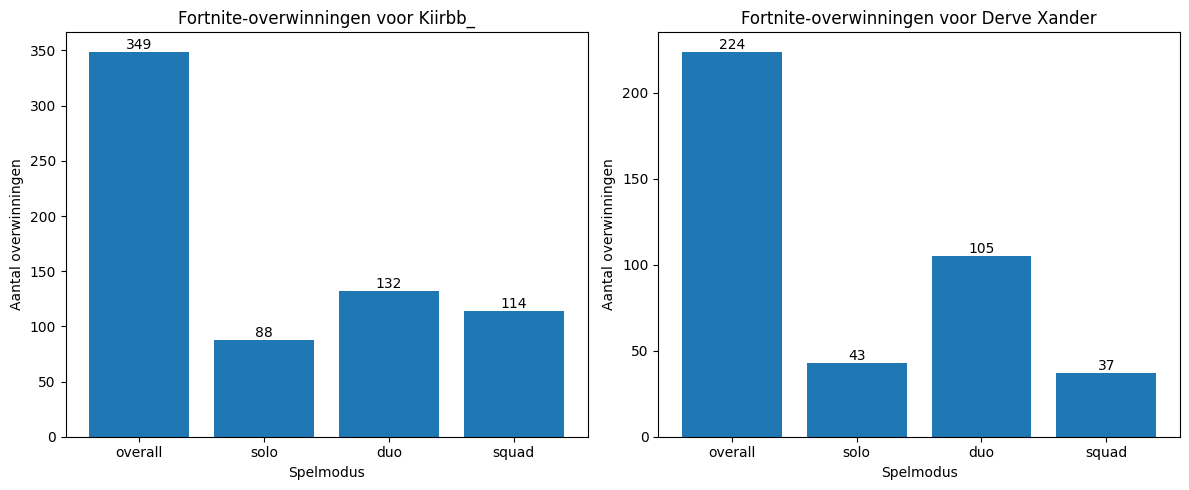

In [31]:
def plot_wins_bar_chart(ax, wins, player_name):
    stat_names = ['overall', 'solo', 'duo', 'squad']

    ax.bar(stat_names, wins)

    for i, win_count in enumerate(wins):
        ax.text(i, win_count, str(win_count), ha='center', va='bottom')

    ax.set_xlabel('Spelmodus')
    ax.set_ylabel('Aantal overwinningen')
    ax.set_title(f'Fortnite-overwinningen voor {player_name}')


def main():
    global player_input
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    if player1_name and player2_name:
        player1_stats = get_player_stats(player1_name)
        player2_stats = get_player_stats(player2_name)

        if player1_stats and player2_stats:
            overall_stats1, solo_stats1, duo_stats1, squad_stats1 = player1_stats
            overall_stats2, solo_stats2, duo_stats2, squad_stats2 = player2_stats

            wins1 = [stats.get('wins', 0) if stats is not None else 0 for stats in [overall_stats1, solo_stats1, duo_stats1, squad_stats1]]
            wins2 = [stats.get('wins', 0) if stats is not None else 0 for stats in [overall_stats2, solo_stats2, duo_stats2, squad_stats2]]

            fig, axs = plt.subplots(1, 2, figsize=(12, 5))

            plot_wins_bar_chart(axs[0], wins1, player1_name)
            plot_wins_bar_chart(axs[1], wins2, player2_name)

            plt.tight_layout()
            plt.show()

        else:
            print("Player information not available.")

if __name__ == "__main__":
    main()


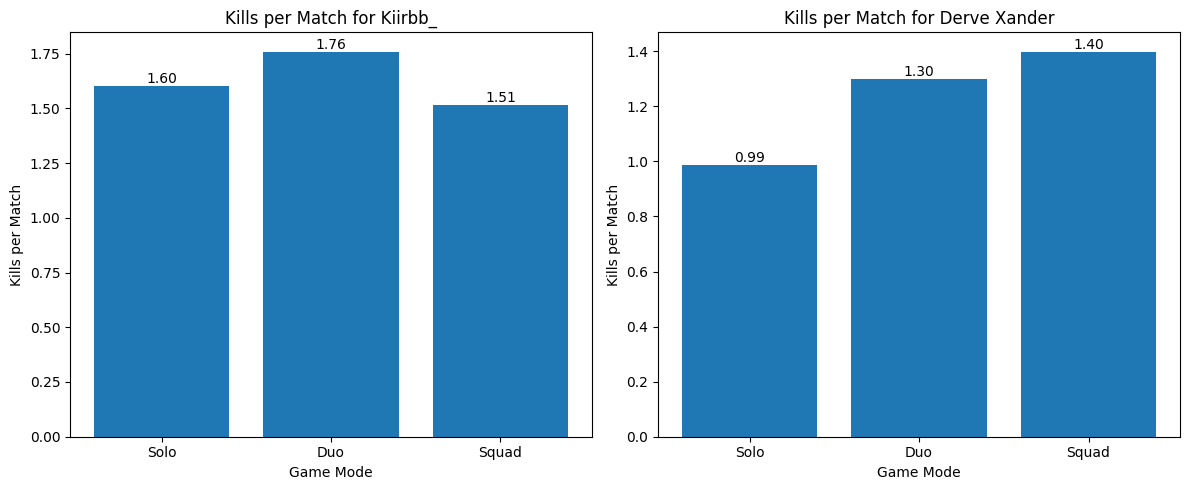

In [32]:
def calculate_kills_per_match(stats):
    if 'kills' in stats and 'matches' in stats and stats['matches'] > 0:
        return stats['kills'] / stats['matches']
    else:
        return 0

def plot_kills_per_match(ax, categories, values, player_name):
    ax.bar(categories, values)

    for i, value in enumerate(values):
        ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')

    ax.set_xlabel('Game Mode')
    ax.set_ylabel('Kills per Match')
    ax.set_title(f'Kills per Match for {player_name}')


def main():
    global player_input
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    if player1_name and player2_name:
        player1_stats = get_player_stats(player1_name)
        player2_stats = get_player_stats(player2_name)

        if player1_stats and player2_stats:
            overall_stats1, solo_stats1, duo_stats1, squad_stats1 = player1_stats
            overall_stats2, solo_stats2, duo_stats2, squad_stats2 = player2_stats

            wins1 = [stats.get('wins', 0) if stats is not None else 0 for stats in [overall_stats1, solo_stats1, duo_stats1, squad_stats1]]
            wins2 = [stats.get('wins', 0) if stats is not None else 0 for stats in [overall_stats2, solo_stats2, duo_stats2, squad_stats2]]

            kills_per_match_solo_1 = calculate_kills_per_match(solo_stats1)
            kills_per_match_duo_1 = calculate_kills_per_match(duo_stats1)
            kills_per_match_squad_1 = calculate_kills_per_match(squad_stats1)

            kills_per_match_solo_2 = calculate_kills_per_match(solo_stats2)
            kills_per_match_duo_2 = calculate_kills_per_match(duo_stats2)
            kills_per_match_squad_2 = calculate_kills_per_match(squad_stats2)

            fig, axs = plt.subplots(1, 2, figsize=(12, 5))

            # Plot kills per match bar chart for player 1
            plot_kills_per_match(axs[0], ['Solo', 'Duo', 'Squad'], [kills_per_match_solo_1, kills_per_match_duo_1, kills_per_match_squad_1], player1_name)

            # Plot kills per match bar chart for player 2
            plot_kills_per_match(axs[1], ['Solo', 'Duo', 'Squad'], [kills_per_match_solo_2, kills_per_match_duo_2, kills_per_match_squad_2], player2_name)

            plt.tight_layout()
            plt.show()

        else:
            print("Player information not available.")

    else:
        print("Player 1 or Player 2 information not available.")

if __name__ == "__main__":
    main()


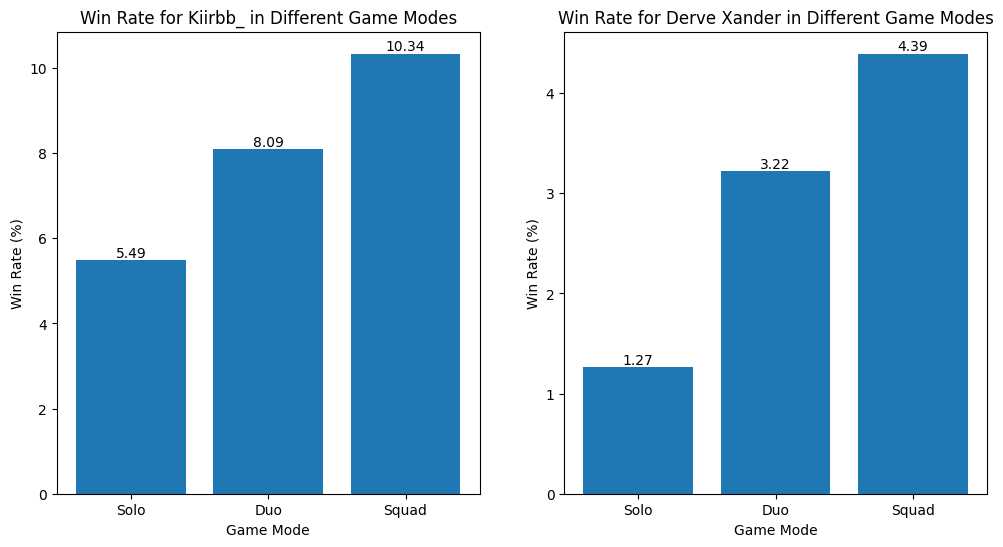

In [33]:
def calculate_win_rate(wins, matches):
    if matches == 0:
        return 0
    return (wins / matches) * 100

def plot_dual_win_rates(player_names, modes, win_rates_list):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1x2 grid for subplots

    for idx, player_name in enumerate(player_names):
        axs[idx].bar(modes, win_rates_list[idx])
        axs[idx].set_xlabel('Game Mode')
        axs[idx].set_ylabel('Win Rate (%)')
        axs[idx].set_title(f'Win Rate for {player_name} in Different Game Modes')

        # Voeg labels toe boven op elke bar
        for i, rate in enumerate(win_rates_list[idx]):
            axs[idx].text(i, rate, f'{rate:.2f}', ha='center', va='bottom')

    plt.show()

def main():
    global player_input
    get_player_input(1)
    get_player_input(2)

    player1_name = player_input.get(1)
    player2_name = player_input.get(2)

    if player1_name and player2_name:
        player1_stats = get_player_stats(player1_name)
        player2_stats = get_player_stats(player2_name)

        if player1_stats and player2_stats:
            win_rates_list = []

            for player_stats in [player1_stats, player2_stats]:
                win_rates = []

                if player_stats[1]:
                    solo_wins = player_stats[1].get('wins', 0)
                    solo_matches = player_stats[1].get('matches', 0)
                    solo_win_rate = calculate_win_rate(solo_wins, solo_matches)
                    win_rates.append(solo_win_rate)

                if player_stats[2]:
                    duo_wins = player_stats[2].get('wins', 0)
                    duo_matches = player_stats[2].get('matches', 0)
                    duo_win_rate = calculate_win_rate(duo_wins, duo_matches)
                    win_rates.append(duo_win_rate)

                if player_stats[3]:
                    squad_wins = player_stats[3].get('wins', 0)
                    squad_matches = player_stats[3].get('matches', 0)
                    squad_win_rate = calculate_win_rate(squad_wins, squad_matches)
                    win_rates.append(squad_win_rate)

                win_rates_list.append(win_rates)

            modes = ['Solo', 'Duo', 'Squad']
            player_names = [player1_name, player2_name]
            plot_dual_win_rates(player_names, modes, win_rates_list)

        else:
            print("Player information not available.")

if __name__ == "__main__":
    main()
